In [1]:
import pandas as pd
import os

def load_data(path):
    csv_path = os.path.join(path)
    return pd.read_csv(csv_path)

In [2]:
Data = load_data('wine.data')
Data

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
y = Data.iloc[:]['1']
X = Data[Data.columns[1:]]

In [4]:
from sklearn.model_selection import KFold
kf = KFold(random_state = 42, shuffle = True)
kf.get_n_splits(X)
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [5]:
# for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)

1


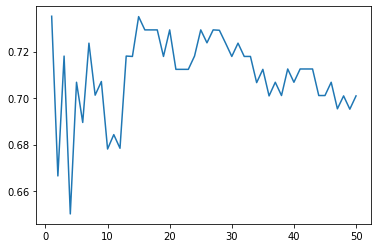

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
x_coords = []
y_coords = []
for i in range(1, 51):
    classifier = KNeighborsClassifier(n_neighbors = i)
    quality = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')
    y_coords.append(np.mean(quality))
    x_coords.append(i)
plt.plot(x_coords, y_coords)
for i in range(0, 50):
    if y_coords[i] == max(y_coords): print(i+1)

In [7]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X)
# X = scaler.transform(X)
# x_coords = []
# y_coords = []
# for i in range(1, 51):
#     classifier = KNeighborsClassifier(n_neighbors = i)
#     quality = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')
#     y_coords.append(np.mean(quality))
#     x_coords.append(i)
# plt.plot(x_coords, y_coords)
# max(y_coords)
# for i in range(0, 50):
#     if y_coords[i] == max(y_coords): print(i+1)
# X

28
29
30
31
32
33
34
35
36
37


array([[ 0.2558245 , -0.50162433, -0.8244853 , ...,  0.40709978,
         1.13169801,  0.97105248],
       [ 0.20622873,  0.01802001,  1.10768971, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [ 1.70650069, -0.34931478,  0.48793547, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 0.34261709,  1.73822194, -0.38701171, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 0.21862767,  0.22408586,  0.01400575, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.40892609,  1.57695301,  1.36288264, ..., -1.51861275,
        -1.42836295, -0.58949046]])

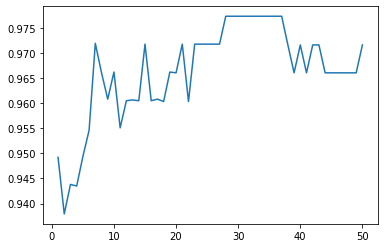

In [8]:
from sklearn.preprocessing import scale
X = scale(X)
x_coords = []
y_coords = []
for i in range(1, 51):
    classifier = KNeighborsClassifier(n_neighbors = i)
    quality = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')
    y_coords.append(np.mean(quality))
    x_coords.append(i)
plt.plot(x_coords, y_coords)
for i in range(0, 50):
    if y_coords[i] == max(y_coords): print(i+1)
X